### Data Science & Business Analytics Intern at The Sparks Foundation
### Task 1: Prediction using supervised machine learning
### Aim: Predicting the scores of students based on the number of study hours.
### By: Ogundiya Joshua

#### Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading data
df = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
df.head()   # This will show the first five rows

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Data exploration

In [3]:
df.shape

(25, 2)

We have 25 rows and 2 columns in our dataset

In [4]:
# Let's check for missing values
df.isna().sum()

Hours     0
Scores    0
dtype: int64

There is no missing value in the dataset

In [5]:
# Let's use the describe function to generate descriptive statistics of our data
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
# let's see the correlatiin between our varibles
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


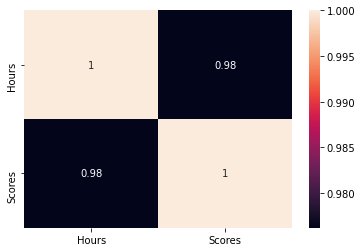

In [7]:
# plotting the correlation
sns.heatmap(df.corr(),annot=True)
plt.show()

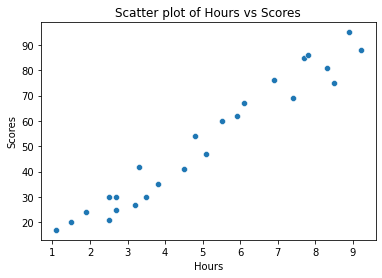

In [8]:
sns.scatterplot(x=df['Hours'], y=df['Scores'])
plt.title('Scatter plot of Hours vs Scores')
plt.show()

### Splitting Data

In [9]:
# Seperate input and output variables
X = df[['Hours']]
Y = df[['Scores']]

# Use train_test_split to split data into train and test data. 80% will be used for training
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

print('Number of train data is:', x_train.shape[0])
print('Number of test data is:', x_test.shape[0])

Number of train data is: 20
Number of test data is: 5


### Training the data

In [10]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

### Making predictions

In [11]:
yhat = lr.predict(x_test)
yhat

array([[83.18814104],
       [27.03208774],
       [27.03208774],
       [69.63323162],
       [59.95115347]])

### Plotting the best fit line

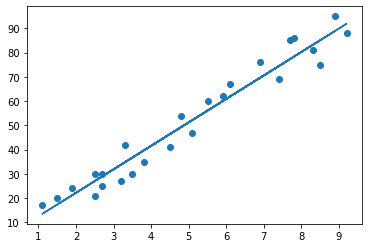

In [12]:
line = lr.coef_*X+lr.intercept_

plt.scatter(X,Y)
plt.plot(X,line)
plt.show()

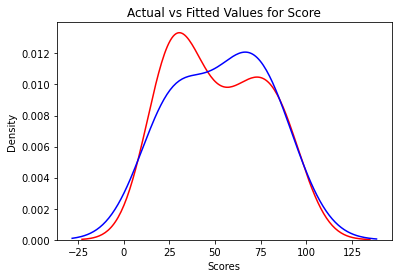

In [13]:
# Plotting distribution plot
ax1 = sns.distplot(df['Scores'], hist=False, color="r", label="Actual Value")
sns.distplot(yhat, hist=False, color="b", label="Predicted Value" , ax=ax1)

plt.title('Actual vs Fitted Values for Score')

plt.show()
plt.close()

### Model evaluation

In [14]:
# Creating a function to compute different evaluation metrics
from sklearn import metrics
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)

In [15]:
print_evaluate(y_test,yhat)

MAE: 3.9207511902099244
MSE: 18.943211722315272
RMSE: 4.352380006653288
R2 Square 0.9678055545167994


### Comparing actual and predicted scores

In [16]:
df2 = pd.DataFrame(y_test)
df2['Predicted'] = yhat
df2

,Scores,Predicted
8,81,83.188141
16,30,27.032088
0,21,27.032088
23,76,69.633232
11,62,59.951153


### Predicted score if a student studies for 9.25 hrs/ day

In [17]:
pred_score =  lr.predict([[9.25]])
print('The score obtained by a student if he/she studies for 9.25hrs/day is {}: '.format(pred_score[0]))

The score obtained by a student if he/she studies for 9.25hrs/day is [92.38611528]: 


### 

## Thank You!